# Import Libraries and read the data set

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv('cars.csv')
print(df['country'].isnull().sum())
print(df.info())
print(df.head())


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB
None
                           car name                 price engine_capacity  \
0           Fiat 500e 2021 La Prima                   TBD               0   
1     Peugeot Traveller 2021 L3 VIP           SAR 140,575               2   
2  Suzuki Jimny 2021 1.5L Automatic            SAR 98,785             1.5   
3    Ford Bronco 2021 2.3T Big Bend       

In [78]:
# Loop through each column and print the unique non-duplicate value
for column in df.columns:
    print(f"Column: {column}")
    unique_values = df[column].drop_duplicates()  # Drop duplicates from the column
    print(unique_values.tolist())  # Print the values as a list
    print("\n")



Column: car name
['Fiat 500e 2021 La Prima', 'Peugeot Traveller 2021 L3 VIP', 'Suzuki Jimny 2021 1.5L Automatic', 'Ford Bronco 2021 2.3T Big Bend', 'Honda HR-V 2021 1.8 i-VTEC LX', 'Honda HR-V 2021 1.8 i-VTEC EX', 'Peugeot Expert 2021 Van L3 A/T', 'Peugeot Expert 2021 Van L3 M/T', 'Renault Koleos 2021 2.5L LE (4WD)', 'Ford Bronco 2021 2.7T Outer Banks', 'Suzuki Jimny 2021 1.5L M/T', 'Honda HR-V 2021 1.8 i-VTEC DX', 'Aston Martin DBS Superleggera Volante 2021 5.2T V12', 'GAC GS8 2021 2.0T GL (2WD)', 'Aston Martin DB11 AMR 2021 5.2T V12', 'GAC GS4 2021 1.5T GE', 'Toyota Highlander 2021 2.5L Hybrid GLE (AWD)', 'Aston Martin DB11 2021 4.0T V8 Volante', 'Toyota Highlander 2021 2.5L Hybrid LE (FWD)', 'Toyota Highlander 2021 2.5L Hybrid Limited (FWD)', 'Aston Martin DBS Superleggera 2021 5.2T V12', 'GAC GS4 2021 1.5T GS', 'Genesis GV80 2021 3.5T Royal (AWD)', 'Toyota Highlander 2021 2.5L Hybrid Limited (AWD)', 'Aston Martin DB11 2021 4.0T V8 Coupe', 'Hyundai Palisade 2021 3.8L GDi (AWD) Premi

# Cleaning the DataFrame form empty (non-numerical) rows

In [79]:
# Define the columns to check
columns_to_check = ['price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats']

# Define a helper function to check if a value is numeric
def contains_numeric(value):
    return any(char.isdigit() for char in str(value))

# Function to determine if a row should be dropped
def row_has_5_or_more_non_numeric(row):
    non_numeric_count = sum(not contains_numeric(row[col]) for col in columns_to_check)
    return non_numeric_count >= 5

# Drop rows where the condition applies
df_cleaned = df[~df.apply(row_has_5_or_more_non_numeric, axis=1)]


# Print the cleaned DataFrame and the number of rows dropped
rows_dropped = len(df) - len(df_cleaned)
print(f"Number of rows dropped: {rows_dropped}")
df = df_cleaned
print(f"Cleaned DataFrame: {print(df.info())}")




Number of rows dropped: 3
<class 'pandas.core.frame.DataFrame'>
Index: 6305 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6305 non-null   object
 1   price            6305 non-null   object
 2   engine_capacity  6305 non-null   object
 3   cylinder         5681 non-null   object
 4   horse_power      6305 non-null   object
 5   top_speed        6305 non-null   object
 6   seats            6305 non-null   object
 7   brand            6305 non-null   object
 8   country          6305 non-null   object
dtypes: object(9)
memory usage: 492.6+ KB
None
Cleaned DataFrame: None


# Cleaning "Brand" column 

In [80]:
df['brand'] = df['brand'].str.replace(' ', '', regex=True)

##### making sure the data within the **brand** column is stripped form White spaces 

# Cleaning "price" column 

#### Replacing the non-numerical values within the price column with empty string (null), and then converting the data type of the column to ***float*** 

In [81]:
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True)
df['price'] = df['price'].where(df['price'].notnull(), None)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print(df['price'].head())

0         NaN
1    140575.0
2     98785.0
3    198000.0
4         NaN
Name: price, dtype: float64


#### Converting all prices to USDs based on the conversion rate for each country

In [82]:
conversion_rates = {
    'ksa': 0.27,      
    'egypt': 0.032,   
    'bahrain': 2.65,  
    'qatar': 0.27,    
    'oman': 2.60,     
    'kuwait': 3.26,   
    'uae': 0.27       
}
for country, rate in conversion_rates.items():
    df.loc[df['country'] == country, 'price'] *= rate
print(df.head())

                           car name     price engine_capacity       cylinder  \
0           Fiat 500e 2021 La Prima       NaN               0  N/A, Electric   
1     Peugeot Traveller 2021 L3 VIP  37955.25               2              4   
2  Suzuki Jimny 2021 1.5L Automatic  26671.95             1.5              4   
3    Ford Bronco 2021 2.3T Big Bend  53460.00             2.3              4   
4     Honda HR-V 2021 1.8 i-VTEC LX       NaN             1.8              4   

  horse_power  top_speed     seats    brand country  
0      Single  Automatic       150     fiat     ksa  
1         180   8 Seater       8.8  peugeot     ksa  
2         102        145  4 Seater   suzuki     ksa  
3         420   4 Seater       7.5     ford     ksa  
4         140        190  5 Seater    honda     ksa  


#### filling the *NAN* price cells with the median of the prices for each brand and country 

In [83]:
price_median = df.groupby(['brand', 'country'])['price'].transform('median')
df['price'].fillna(price_median.round(2), inplace=True)
df['price'].fillna(df['price'].median().round(2), inplace=True)  # Replace with global median  as a fallback
df['price'].round(2)
print(df.head())

                           car name     price engine_capacity       cylinder  \
0           Fiat 500e 2021 La Prima  19219.95               0  N/A, Electric   
1     Peugeot Traveller 2021 L3 VIP  37955.25               2              4   
2  Suzuki Jimny 2021 1.5L Automatic  26671.95             1.5              4   
3    Ford Bronco 2021 2.3T Big Bend  53460.00             2.3              4   
4     Honda HR-V 2021 1.8 i-VTEC LX  38005.20             1.8              4   

  horse_power  top_speed     seats    brand country  
0      Single  Automatic       150     fiat     ksa  
1         180   8 Seater       8.8  peugeot     ksa  
2         102        145  4 Seater   suzuki     ksa  
3         420   4 Seater       7.5     ford     ksa  
4         140        190  5 Seater    honda     ksa  


C:\Users\omarh\AppData\Local\Temp\ipykernel_12420\3173280428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(price_median.round(2), inplace=True)
C:\Users\omarh\AppData\Local\Temp\ipykernel_12420\3173280428.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [84]:
print(df['price'].isnull().sum())

0


# Cleaning "cylinder" column 

#### Replacing the cylinder for electric cars with **Zero**, converting the column to float, and then filling the null cells with the median of the cylinder for each brand  

In [85]:
df['cylinder'] = df['cylinder'].apply(lambda x: 0 if str(x).strip() == "N/A, Electric" else x)

df['cylinder'] = pd.to_numeric(df['cylinder'], errors='coerce')

df['cylinder'] = df.groupby('brand')['cylinder'].transform(lambda x: x.fillna(x.median()))

print(df['cylinder'])


0        0.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
6303     8.0
6304     8.0
6305    12.0
6306    10.0
6307     8.0
Name: cylinder, Length: 6305, dtype: float64


# Cleaning "horse_power" column 

#### keeping only numerical values in the column, filling the NAN cells with the median for the horse powers for the cars of each brand 

In [86]:
df['horse_power'] = df['horse_power'].str.replace(r'[^0-9.]', '', regex=True)
df['horse_power'] = pd.to_numeric(df['horse_power'], errors='coerce')
df['horse_power'] = df.groupby('brand')['horse_power'].transform(lambda x: x.fillna(x.median()))
print(df['horse_power'].head())


0    100.0
1    180.0
2    102.0
3    420.0
4    140.0
Name: horse_power, dtype: float64


# Cleaning "Engine Capacity" column 

#### keeping only numerical values in the column, dividing any value that is grater than 10 by 1000 to convert their unit form cubic centimeter to liter 

In [87]:
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')  # Convert to float, setting invalid values to NaN
df['engine_capacity'] = df['engine_capacity'].apply(lambda x: x / 1000 if x > 10 else x)
print(df['engine_capacity'])


0       0.0
1       2.0
2       1.5
3       2.3
4       1.8
       ... 
6303    6.8
6304    4.0
6305    6.6
6306    6.5
6307    6.8
Name: engine_capacity, Length: 6305, dtype: float64


# Seats & Top Speed



#### form the top speed column moving any any value that has the word ****Seater**** to the seats table, and moving values that are greater than 40 from the **seats** column to the top **speed column**

In [88]:
df['seats'] = df['seats'].str.replace(r'[^\d.]', '', regex=True)
df['seats'] = df['seats'].where(df['seats'].notnull(), None)
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')




for index, row in df.iterrows():
    if isinstance(row['top_speed'], str):
        if "Seater" in row['top_speed']:
            parts = row['top_speed'].split()  # Split the string
            if len(parts) == 2 and parts[1] == "Seater" and parts[0].isdigit():
                
                df.at[index, 'seats'] = parts[0] # Move the value to the "seats" column
                
                df.at[index, 'top_speed'] = None # Set the "top_speed" column to None
    
    if row['seats'] >40:
        df.at[index, 'top_speed'] = row['seats']


C:\Users\omarh\AppData\Local\Temp\ipykernel_12420\2834586609.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'seats'] = parts[0] # Move the value to the "seats" column


# Seats

#### For the seats column we replaced the null values and the values that are greater than 15 with a the median of the seats for each brand, and we converted the column data type to integer  because seats is an integer value

In [89]:

df['seats'] = pd.to_numeric(df['seats'], errors='coerce')
seats_median = df.groupby('brand')['seats'].transform('median')
df['seats'] = df.apply(
    lambda row: seats_median[row.name] if pd.isna(row['seats']) or row['seats'] > 15 else row['seats'],
    axis=1
)
df['seats'].fillna(df['seats'].median(), inplace=True)  
df['seats'] = df['seats'].astype(int)
print(df['seats'].head())

0    4
1    8
2    4
3    4
4    5
Name: seats, dtype: int32


C:\Users\omarh\AppData\Local\Temp\ipykernel_12420\693301859.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seats'].fillna(df['seats'].median(), inplace=True)


# Top Speed

#### For this column we replaced the null values and the values greater than 400 with the median of the speeds for each brand 

In [90]:


df['top_speed'] = pd.to_numeric(df['top_speed'], errors='coerce')
top_speed_median = df.groupby('brand')['top_speed'].transform('median')


df['top_speed'] = df.apply(
    lambda row: top_speed_median[row.name] if pd.isna(row['top_speed']) or row['top_speed'] > 400 else row['top_speed'],
    axis=1
)
df['top_speed'].fillna(df['top_speed'].median(), inplace=True)
df['top_speed'] = df['top_speed'].astype(int)

print(df['top_speed'].head())


0    150
1    205
2    145
3    175
4    190
Name: top_speed, dtype: int32


C:\Users\omarh\AppData\Local\Temp\ipykernel_12420\1564495341.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['top_speed'].fillna(df['top_speed'].median(), inplace=True)


# Checking for Nulls

In [91]:
print(df['engine_capacity'].isnull().sum())
print(df['engine_capacity'].isnull().sum())
print(df['cylinder'].isnull().sum())
print(df['horse_power'].isnull().sum())
print(df['brand'].isnull().sum())
print(df['top_speed'].isnull().sum())
print(df['price'].isnull().sum())
print(df['seats'].isnull().sum())



0
0
0
0
0
0
0
0


In [92]:
# Loop through each column and print the unique non-duplicate value
for column in df.columns:
    print(f"Column: {column}")
    unique_values = df[column].drop_duplicates()  # Drop duplicates from the column
    print(unique_values.tolist())  # Print the values as a list
    print("\n")



Column: car name
['Fiat 500e 2021 La Prima', 'Peugeot Traveller 2021 L3 VIP', 'Suzuki Jimny 2021 1.5L Automatic', 'Ford Bronco 2021 2.3T Big Bend', 'Honda HR-V 2021 1.8 i-VTEC LX', 'Honda HR-V 2021 1.8 i-VTEC EX', 'Peugeot Expert 2021 Van L3 A/T', 'Peugeot Expert 2021 Van L3 M/T', 'Renault Koleos 2021 2.5L LE (4WD)', 'Ford Bronco 2021 2.7T Outer Banks', 'Suzuki Jimny 2021 1.5L M/T', 'Honda HR-V 2021 1.8 i-VTEC DX', 'Aston Martin DBS Superleggera Volante 2021 5.2T V12', 'GAC GS8 2021 2.0T GL (2WD)', 'Aston Martin DB11 AMR 2021 5.2T V12', 'GAC GS4 2021 1.5T GE', 'Toyota Highlander 2021 2.5L Hybrid GLE (AWD)', 'Aston Martin DB11 2021 4.0T V8 Volante', 'Toyota Highlander 2021 2.5L Hybrid LE (FWD)', 'Toyota Highlander 2021 2.5L Hybrid Limited (FWD)', 'Aston Martin DBS Superleggera 2021 5.2T V12', 'GAC GS4 2021 1.5T GS', 'Genesis GV80 2021 3.5T Royal (AWD)', 'Toyota Highlander 2021 2.5L Hybrid Limited (AWD)', 'Aston Martin DB11 2021 4.0T V8 Coupe', 'Hyundai Palisade 2021 3.8L GDi (AWD) Premi

# Scaling and Encoding 

### Frequency Encoding for **brand**

In [93]:
# Frequency Encoding for 'brand'
brand_freq = df['brand'].value_counts() / len(df)
df['brand'] = df['brand'].map(brand_freq)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6305 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car name         6305 non-null   object 
 1   price            6305 non-null   float64
 2   engine_capacity  6305 non-null   float64
 3   cylinder         6305 non-null   float64
 4   horse_power      6305 non-null   float64
 5   top_speed        6305 non-null   int32  
 6   seats            6305 non-null   int32  
 7   brand            6305 non-null   float64
 8   country          6305 non-null   object 
dtypes: float64(5), int32(2), object(2)
memory usage: 572.4+ KB
None


### Scaling all the necessary columns 

In [94]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats','brand']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols] )

# Check the DataFrame after scaling
print(df.head())


                           car name     price  engine_capacity  cylinder  \
0           Fiat 500e 2021 La Prima  19219.95        -2.061910 -2.719019   
1     Peugeot Traveller 2021 L3 VIP  37955.25        -0.597165 -0.663454   
2  Suzuki Jimny 2021 1.5L Automatic  26671.95        -0.963351 -0.663454   
3    Ford Bronco 2021 2.3T Big Bend  53460.00        -0.377453 -0.663454   
4     Honda HR-V 2021 1.8 i-VTEC LX  38005.20        -0.743640 -0.663454   

   horse_power  top_speed     seats     brand country  
0    -1.073431  -1.638619 -0.676441 -1.145386     ksa  
1    -0.625448  -0.362891  1.973015 -0.731837     ksa  
2    -1.062232  -1.754595 -0.676441 -1.058973     ksa  
3     0.718501  -1.058743 -0.676441  0.539672     ksa  
4    -0.849440  -0.710817 -0.014077 -0.651596     ksa  


In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6305 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car name         6305 non-null   object 
 1   price            6305 non-null   float64
 2   engine_capacity  6305 non-null   float64
 3   cylinder         6305 non-null   float64
 4   horse_power      6305 non-null   float64
 5   top_speed        6305 non-null   float64
 6   seats            6305 non-null   float64
 7   brand            6305 non-null   float64
 8   country          6305 non-null   object 
dtypes: float64(7), object(2)
memory usage: 621.6+ KB
None


### Dropping **car name** and **country** columns as they don't contribute to the models efficiency      

In [96]:
df = df.drop(columns=['car name', 'country'])
print(df.columns)


Index(['price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed',
       'seats', 'brand'],
      dtype='object')


### Splitting the data

#### Splitting the data into three sets, Training (**60%**), Validation(**20%**), Test (**20%**)

In [97]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])  # All columns except 'price' because it's the target column (labe) 
y = df['price']                 # Target column

# Splitting the data  into 60% training and 40% temp (validation + testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the 40% temp into 20% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the sizes of the splits
print(f"Training set size: {(X_train.shape[0]/len(df)) * 100:.0f}% of the data")
print(f"Validation set size: {(X_val.shape[0]/len(df)) * 100:.0f}% of the data")
print(f"Testing set size: {(X_test.shape[0]/len(df)) * 100:.0f}% of the data")


Training set size: 60% of the data
Validation set size: 20% of the data
Testing set size: 20% of the data


# Linear Regression Closed-Form Solution

In [98]:


X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_val_bias = np.c_[np.ones(X_val.shape[0]), X_val]

# Closed-form solution: theta = (X^T X)^(-1) X^T y
theta_closed_form = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train


y_val_pred = X_val_bias @ theta_closed_form

print("Coefficients (Closed-Form):", theta_closed_form)


Coefficients (Closed-Form): [ 70951.02044169 -16872.79322384  18073.39894133  56447.98347037
  17379.46930316  -7290.16736874 -10506.42728356]


## Plot

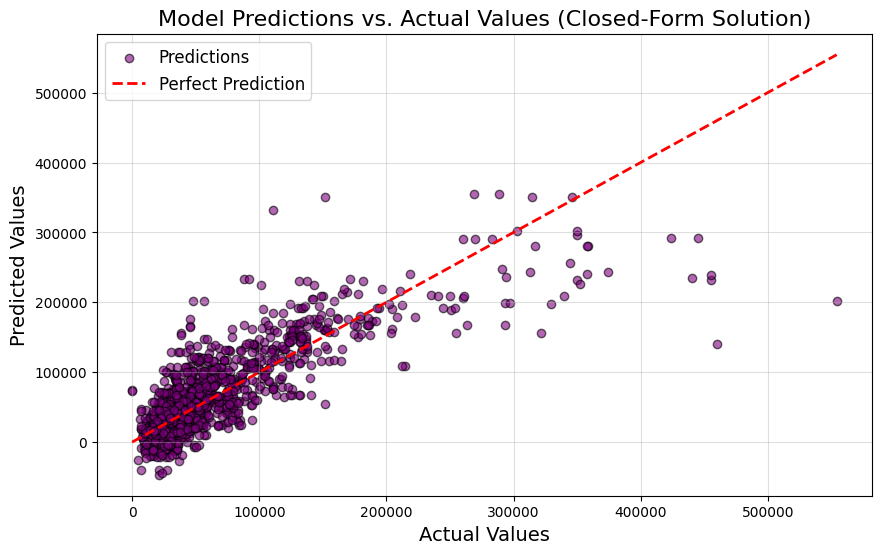

In [99]:
# Plot "Model Predictions vs. Actual Values"
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, edgecolors="k", color="purple", label="Predictions")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label="Perfect Prediction")
plt.title("Model Predictions vs. Actual Values (Closed-Form Solution)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

# Gradient Descent 

In [100]:
theta = np.zeros(X_train_bias.shape[1])
alpha = 0.1  # Learning rate
num_iterations = 1000  # Number of iterations

# Gradient Descent Loop
for i in range(num_iterations):
    gradient = (1 / X_train_bias.shape[0]) * (X_train_bias.T @ (X_train_bias @ theta - y_train))
    theta -= alpha * gradient

y_val_pred_gd = X_val_bias @ theta

print("Coefficients (Gradient Descent):", theta)


Coefficients (Gradient Descent): [ 70951.0213073  -16872.6268649   18073.22356114  56447.97283439
  17379.50134261  -7290.17907052 -10506.42973262]


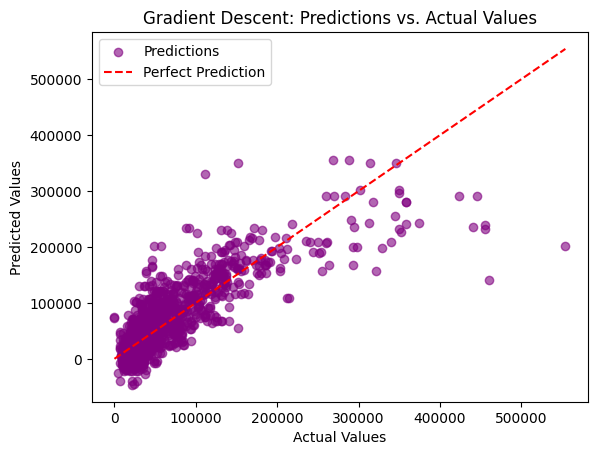

In [101]:

# Plot the actual vs predicted values
plt.scatter(y_val, y_val_pred_gd, label="Predictions", color='purple', alpha=0.6)

# Plot the perfect prediction line
perfect_line = np.linspace(min(y_val), max(y_val), 100)
plt.plot(perfect_line, perfect_line, 'r--', label="Perfect Prediction")

# Labels and legend
plt.title("Gradient Descent: Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Validation of both solutions

Validation Metrics:
MSE:
  Closed-Form: 1596298836.9868
  Gradient Descent: 1596298728.1574
MAE:
  Closed-Form: 26888.5384
  Gradient Descent: 26888.5387
R^2:
  Closed-Form: 0.6367
  Gradient Descent: 0.6367

Prediction Differences:
Max Absolute Difference: 0.5983
Are predictions close (within 1e-5 tolerance)? False


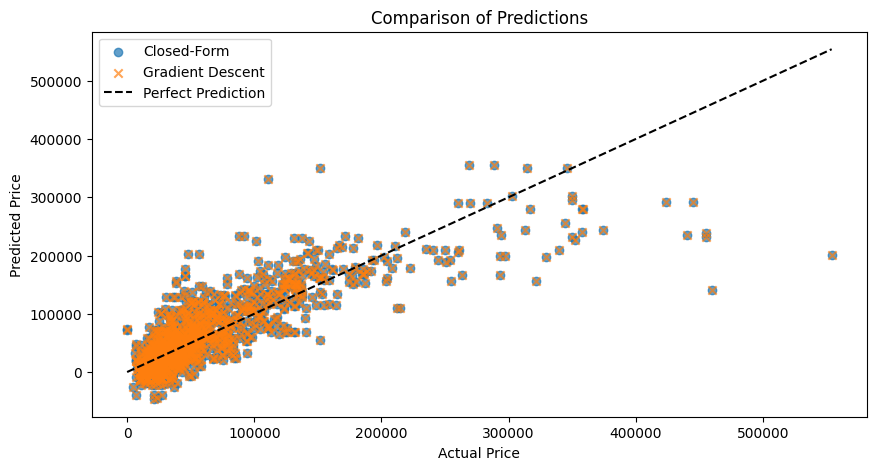

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure X_val_bias has the bias term
if X_val_bias.shape[1] != theta_closed_form.shape[0]:
    X_val_bias = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

# Predictions from Closed-Form Solution
y_val_pred_cf = X_val_bias @ theta_closed_form

# Predictions from Gradient Descent
y_val_pred_gd = X_val_bias @ theta

# Calculate Metrics
metrics = {
    "MSE": {
        "Closed-Form": mean_squared_error(y_val, y_val_pred_cf),
        "Gradient Descent": mean_squared_error(y_val, y_val_pred_gd)
    },
    "MAE": {
        "Closed-Form": mean_absolute_error(y_val, y_val_pred_cf),
        "Gradient Descent": mean_absolute_error(y_val, y_val_pred_gd)
    },
    "R^2": {
        "Closed-Form": r2_score(y_val, y_val_pred_cf),
        "Gradient Descent": r2_score(y_val, y_val_pred_gd)
    }
}

# Display Metrics
print("Validation Metrics:")
for metric, results in metrics.items():
    print(f"{metric}:")
    for method, value in results.items():
        print(f"  {method}: {value:.4f}")

# Compare Predictions
pred_diff = y_val_pred_cf - y_val_pred_gd
print("\nPrediction Differences:")
print(f"Max Absolute Difference: {np.max(np.abs(pred_diff)):.4f}")
print(f"Are predictions close (within 1e-5 tolerance)? {np.allclose(y_val_pred_cf, y_val_pred_gd, atol=1e-5)}")


# Plotting Predictions for Visual Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred_cf, label='Closed-Form', alpha=0.7)
plt.scatter(y_val, y_val_pred_gd, label='Gradient Descent', alpha=0.7, marker='x')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Predictions')
plt.legend()
plt.show()


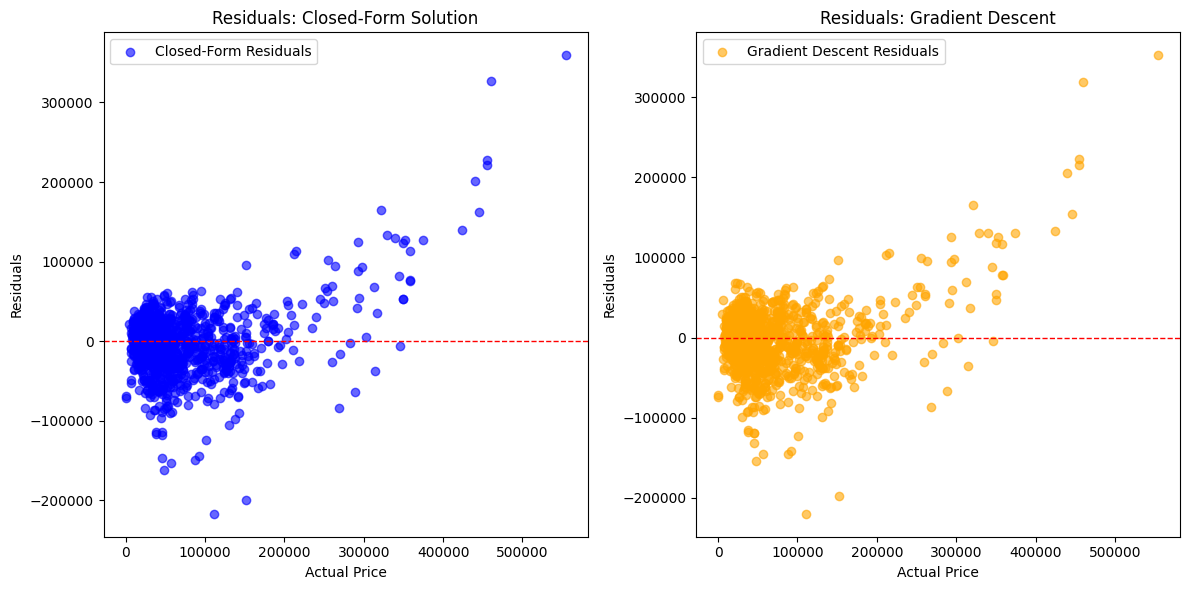

In [113]:


# Calculate residuals
residuals_cf = y_val - y_val_pred  # Closed-Form residuals
residuals_gd = y_val - y_val_pred_gd  # Gradient Descent residuals

# Plot residuals for Closed-Form and Gradient Descent
plt.figure(figsize=(12, 6))

# Residuals for Closed-Form
plt.subplot(1, 2, 1)
plt.scatter(y_val, residuals_cf, alpha=0.6, label='Closed-Form Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals: Closed-Form Solution")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.legend()

# Residuals for Gradient Descent
plt.subplot(1, 2, 2)
plt.scatter(y_val, residuals_gd, alpha=0.6, label='Gradient Descent Residuals', color='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals: Gradient Descent")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.legend()

plt.tight_layout()
plt.show()




# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Variables to store results for each degree
degrees = range(2, 11)
results = {
    "degree": [],
    "r2_scores": [],
    "mse_scores": [],
    "mae_scores": [],
    "y_actual": None,
    "y_pred_best": None,
    "best_degree": None,
}

# Apply Polynomial Features
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Fit Linear Regression to Polynomial Features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Evaluate on validation set
    y_val_pred_poly = model.predict(X_val_poly)
    r2 = model.score(X_val_poly, y_val)
    mse = mean_squared_error(y_val, y_val_pred_poly)
    mae = mean_absolute_error(y_val, y_val_pred_poly)
    
    # Store the results
    results["degree"].append(degree)
    results["r2_scores"].append(r2)
    results["mse_scores"].append(mse)
    results["mae_scores"].append(mae)

    # Check and store the best degree based on R² score
    if results["best_degree"] is None or r2 > max(results["r2_scores"][:-1]):
        results["best_degree"] = degree
        results["y_actual"] = y_val
        results["y_pred_best"] = y_val_pred_poly

    # Print results for the current degree
    print(f"Degree {degree}:")
    print(f"  R^2 Score: {r2:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print("\n")





Degree 2:
  R^2 Score: 0.6255
  Mean Squared Error (MSE): 1645494705.4166
  Mean Absolute Error (MAE): 22472.4879


Degree 3:
  R^2 Score: 0.7383
  Mean Squared Error (MSE): 1149856355.0637
  Mean Absolute Error (MAE): 19414.2500


Degree 4:
  R^2 Score: 0.7213
  Mean Squared Error (MSE): 1224794020.2262
  Mean Absolute Error (MAE): 17378.5036


Degree 5:
  R^2 Score: 0.3644
  Mean Squared Error (MSE): 2792926928.8157
  Mean Absolute Error (MAE): 15916.7251


Degree 6:
  R^2 Score: -49700908.8262
  Mean Squared Error (MSE): 218387576839235648.0000
  Mean Absolute Error (MAE): 16908228.2335


Degree 7:
  R^2 Score: -194930727.5614
  Mean Squared Error (MSE): 856532598917918208.0000
  Mean Absolute Error (MAE): 62969048.3112


Degree 8:
  R^2 Score: -837832461.4127
  Mean Squared Error (MSE): 3681465830371745792.0000
  Mean Absolute Error (MAE): 63188134.2069


Degree 9:
  R^2 Score: -301708922.1822
  Mean Squared Error (MSE): 1325719808247714304.0000
  Mean Absolute Error (MAE): 3561806

## Plots

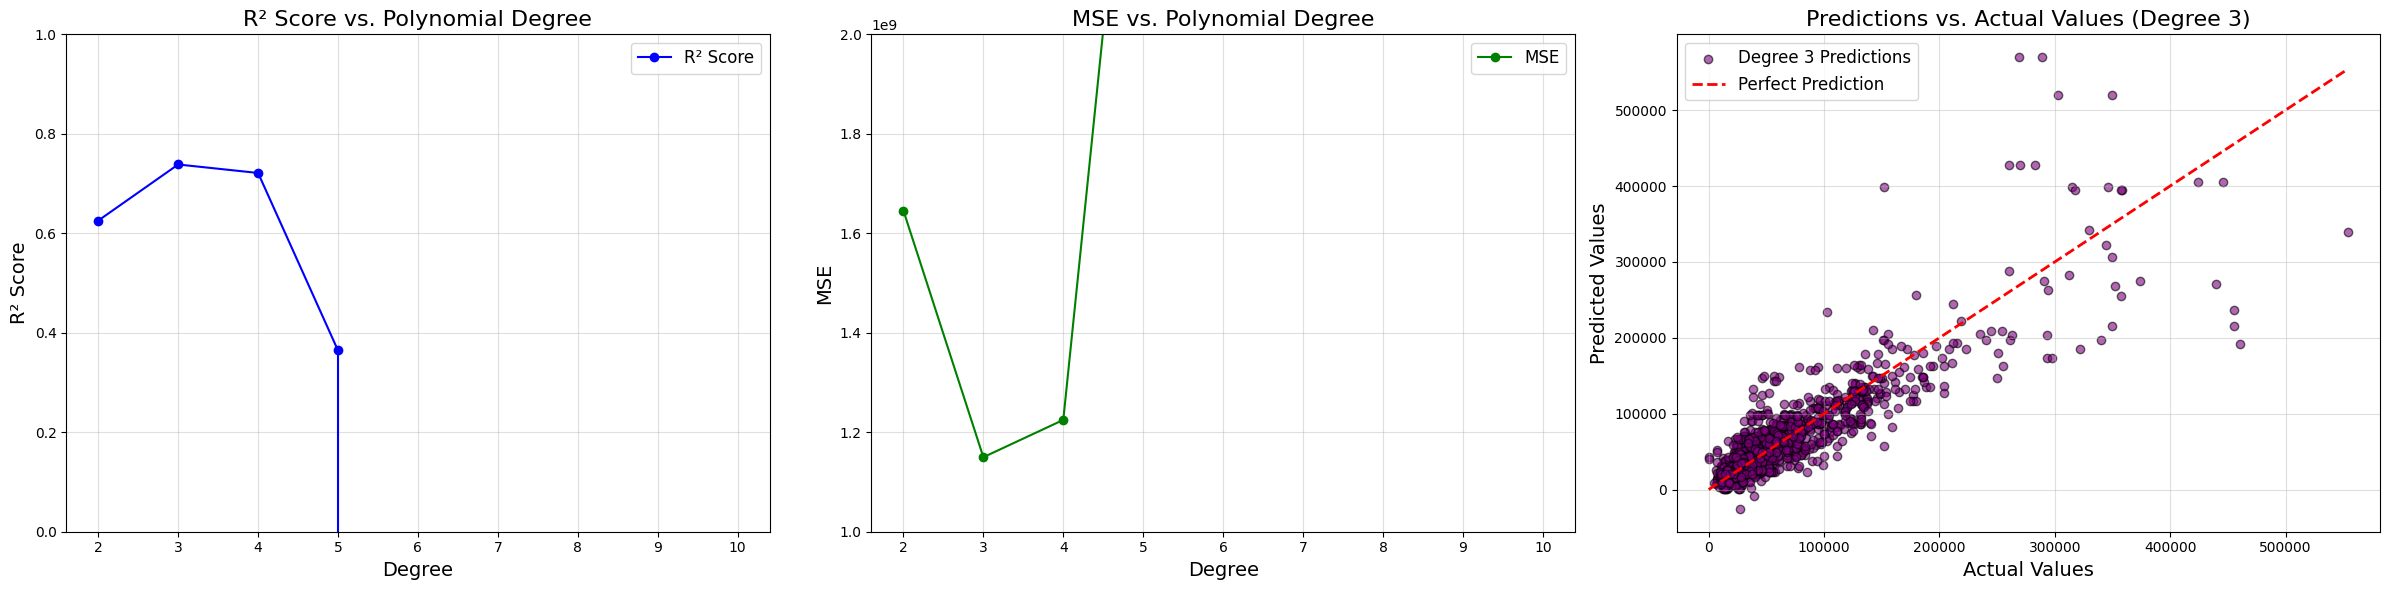

In [105]:
# Subplots: Separate plots for each metric + Predictions vs. Actual Values
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot R² Score vs. Degree
axes[0].plot(results["degree"], results["r2_scores"], marker='o', color="blue", label="R² Score")
axes[0].set_title("R² Score vs. Polynomial Degree", fontsize=16)
axes[0].set_xlabel("Degree", fontsize=14)
axes[0].set_ylabel("R² Score", fontsize=14)
axes[0].set_ylim([0, 1])  # Focus on relevant range for R²
axes[0].grid(alpha=0.4)
axes[0].legend(fontsize=12)

# Plot MSE vs. Degree
axes[1].plot(results["degree"], results["mse_scores"], marker='o', color="green", label="MSE")
axes[1].set_title("MSE vs. Polynomial Degree", fontsize=16)
axes[1].set_xlabel("Degree", fontsize=14)
axes[1].set_ylabel("MSE", fontsize=14)
axes[1].set_ylim([1e9, 2e9])  # Highlight the range of meaningful MSE values
axes[1].grid(alpha=0.4)
axes[1].legend(fontsize=12)

# Plot Predictions vs. Actual Values for the Best Degree
axes[2].scatter(results["y_actual"], results["y_pred_best"], alpha=0.6, edgecolors="k", color="purple", label=f"Degree {results['best_degree']} Predictions")
axes[2].plot([results["y_actual"].min(), results["y_actual"].max()],
             [results["y_actual"].min(), results["y_actual"].max()], 'r--', linewidth=2, label="Perfect Prediction")
axes[2].set_title(f"Predictions vs. Actual Values (Degree {results['best_degree']})", fontsize=16)
axes[2].set_xlabel("Actual Values", fontsize=14)
axes[2].set_ylabel("Predicted Values", fontsize=14)
axes[2].grid(alpha=0.4)
axes[2].legend(fontsize=12)

plt.tight_layout()
plt.show()


# Radial Basis Function (RBF)

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 3. Kernel Ridge Regression (RBF) with Grid Search
kr_params = {'alpha': [0.1, 0.01, 0.001, 1, 10, 100]}
kernel_ridge = KernelRidge(kernel='rbf')
kr_grid = GridSearchCV(estimator=kernel_ridge, param_grid=kr_params, scoring='r2', cv=5)
kr_grid.fit(X_train, y_train)

# Print best parameters and R^2 scores
print("Best Kernel Ridge Alpha (RBF):", kr_grid.best_params_['alpha'])
print("Best Kernel Ridge R^2 Score:", kr_grid.best_score_)
print("Kernel Ridge R^2 on Validation Set:", kr_grid.score(X_val, y_val))

# Predict on the validation set
y_val_pred_kr = kr_grid.predict(X_val)

# Compute validation metrics
mse_kr = mean_squared_error(y_val, y_val_pred_kr)
mae_kr = mean_absolute_error(y_val, y_val_pred_kr)
r2_kr = r2_score(y_val, y_val_pred_kr)

# Print validation metrics
print(f"Kernel Ridge Validation Metrics:")
print(f"  Mean Squared Error (MSE): {mse_kr:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_kr:.4f}")
print(f"  R^2 Score: {r2_kr:.2f}")





Best Kernel Ridge Alpha (RBF): 0.1
Best Kernel Ridge R^2 Score: 0.6235025153597876
Kernel Ridge R^2 on Validation Set: 0.8336934727317188
Kernel Ridge Validation Metrics:
  Mean Squared Error (MSE): 730756833.8219
  Mean Absolute Error (MAE): 14547.5074
  R^2 Score: 0.83


# Feature Selection (Forward Selection)

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Start with an empty set of features
selected_features = []
remaining_features = list(X_train.columns)
best_score = -np.inf
r2_scores = []
mse_scores = []
mae_scores = []
print("Forward Selection Process with Validation Metrics:\n")

while remaining_features:
    scores = {}
    metrics = {}
    
    for feature in remaining_features:
        # Add feature to the model
        trial_features = selected_features + [feature]
        X_train_subset = X_train[trial_features]
        X_val_subset = X_val[trial_features]
        
        # Train Linear Regression
        model = LinearRegression()
        model.fit(X_train_subset, y_train)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val_subset)
        
        # Evaluate on validation set
        r2 = model.score(X_val_subset, y_val)
        mse = mean_squared_error(y_val, y_val_pred)
        mae = mean_absolute_error(y_val, y_val_pred)
        
        scores[feature] = r2
        metrics[feature] = {'R²': r2, 'MSE': mse, 'MAE': mae}
    
    # Find the best feature to add
    best_feature = max(scores, key=scores.get)
    
    if scores[best_feature] > best_score:
        r2_scores.append(metrics[best_feature]['R²'])
        mse_scores.append(metrics[best_feature]['MSE'])
        mae_scores.append(metrics[best_feature]['MAE'])
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_score = scores[best_feature]
        
        # Print the metrics for the selected feature
        print(f"Selected Feature: {best_feature}")
        print(f"  R² Score: {metrics[best_feature]['R²']:.4f}")
        print(f"  Mean Squared Error (MSE): {metrics[best_feature]['MSE']:.4f}")
        print(f"  Mean Absolute Error (MAE): {metrics[best_feature]['MAE']:.4f}\n")
        
    else:
        break  # Stop if no improvement

print("\nFinal Selected Features:", selected_features)


Forward Selection Process with Validation Metrics:

Selected Feature: horse_power
  R² Score: 0.6105
  Mean Squared Error (MSE): 1711323661.6795
  Mean Absolute Error (MAE): 25856.2765

Selected Feature: top_speed
  R² Score: 0.6267
  Mean Squared Error (MSE): 1640374057.2535
  Mean Absolute Error (MAE): 27116.8768

Selected Feature: cylinder
  R² Score: 0.6289
  Mean Squared Error (MSE): 1630841865.2239
  Mean Absolute Error (MAE): 27104.2940

Selected Feature: engine_capacity
  R² Score: 0.6395
  Mean Squared Error (MSE): 1583893015.2878
  Mean Absolute Error (MAE): 26376.3469


Final Selected Features: ['horse_power', 'top_speed', 'cylinder', 'engine_capacity']


## Plot 

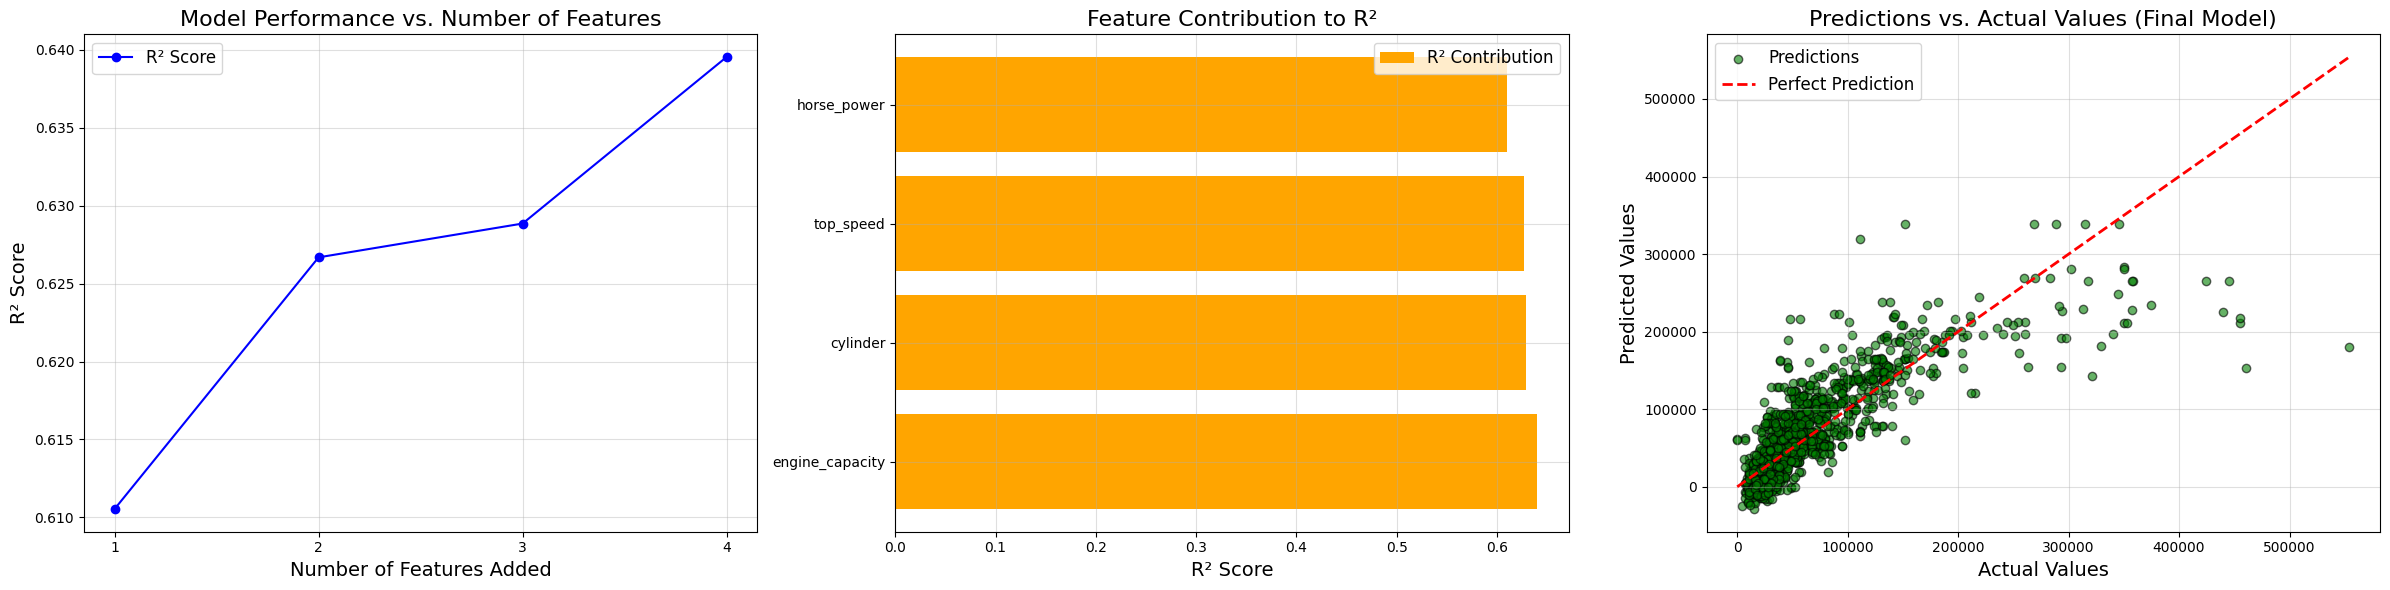

In [108]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Plot 1: Model Performance vs. Number of Features (R² Score)
axes[0].plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', color='blue', label="R² Score")
axes[0].set_title("Model Performance vs. Number of Features", fontsize=16)
axes[0].set_xlabel("Number of Features Added", fontsize=14)
axes[0].set_ylabel("R² Score", fontsize=14)
axes[0].set_xticks(range(1, len(r2_scores) + 1))
axes[0].grid(alpha=0.4)
axes[0].legend(fontsize=12)

# Plot 2: Feature Contribution to R²
axes[1].barh(selected_features, r2_scores, color='orange', label="R² Contribution")
axes[1].set_title("Feature Contribution to R²", fontsize=16)
axes[1].set_xlabel("R² Score", fontsize=14)
axes[1].invert_yaxis()  # To align the first added feature at the top
axes[1].grid(alpha=0.4)
axes[1].legend(fontsize=12)

# Plot 3: Predictions vs. Actual Values
# Scatter plot for the final model (selected features)
X_val_final = X_val[selected_features]  # Subset validation data with selected features
final_model = LinearRegression()
final_model.fit(X_train[selected_features], y_train)  # Train final model
y_val_pred_final = final_model.predict(X_val_final)  # Predict on validation data

axes[2].scatter(y_val, y_val_pred_final, alpha=0.6, edgecolors="k", color="green", label="Predictions")
axes[2].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label="Perfect Prediction")
axes[2].set_title("Predictions vs. Actual Values (Final Model)", fontsize=16)
axes[2].set_xlabel("Actual Values", fontsize=14)
axes[2].set_ylabel("Predicted Values", fontsize=14)
axes[2].legend(fontsize=12)
axes[2].grid(alpha=0.4)

plt.tight_layout()
plt.show()


# LASSO and Ridge Regularization

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. LASSO Regression with Grid Search
lasso_params = {'alpha': [0.1, 80, 10, 50, 1000, 1800, 2000]}
lasso = Lasso()
lasso_grid = GridSearchCV(estimator=lasso, param_grid=lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
print("Best LASSO Alpha:", lasso_grid.best_params_['alpha'])
r2_lasso = lasso_grid.score(X_val, y_val)
print(f"LASSO R^2 on Validation Set: {r2_lasso:.3f}")

# Predict on the validation set
y_val_pred_lasso = lasso_grid.predict(X_val)

# Compute metrics
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)

print(f"LASSO Validation Metrics:")
print(f"  Mean Squared Error (MSE): {mse_lasso:.3f}")
print(f"  Mean Absolute Error (MAE): {mae_lasso:.3f}")


print("\n")

# 2. Ridge Regression with Grid Search
ridge_params = {'alpha': [0.1, 80, 10, 50, 1000, 1800, 2000]}
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge, param_grid=ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
print("Best Ridge Alpha:", ridge_grid.best_params_['alpha'])
ridge_r2 = ridge_grid.score(X_val, y_val)
print(f"Ridge R^2 on Validation Set: {ridge_r2:.3f}" )

# Predict on the validation set
y_val_pred_ridge = ridge_grid.predict(X_val)
# Compute metrics
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)


print(f"Ridge Validation Metrics:")
print(f"  Mean Squared Error (MSE): {mse_ridge:.3f}")
print(f"  Mean Absolute Error (MAE): {mae_ridge:.3f}")


print("\n")

print("Cross-Validation LASSO R² Scores:", lasso_grid.cv_results_['mean_test_score'])
print("Cross-Validation Ridge R² Scores:", ridge_grid.cv_results_['mean_test_score'])




Best LASSO Alpha: 2000
LASSO R^2 on Validation Set: 0.644
LASSO Validation Metrics:
  Mean Squared Error (MSE): 1565725442.551
  Mean Absolute Error (MAE): 26291.665


Best Ridge Alpha: 1000
Ridge R^2 on Validation Set: 0.660
Ridge Validation Metrics:
  Mean Squared Error (MSE): 1495297464.160
  Mean Absolute Error (MAE): 24957.285


Cross-Validation LASSO R² Scores: [0.28961629 0.29214755 0.28993391 0.29120544 0.31880068 0.32504777
 0.32672505]
Cross-Validation Ridge R² Scores: [0.28968474 0.33440771 0.29654504 0.320153   0.42529274 0.42007526
 0.41731802]


## Plots

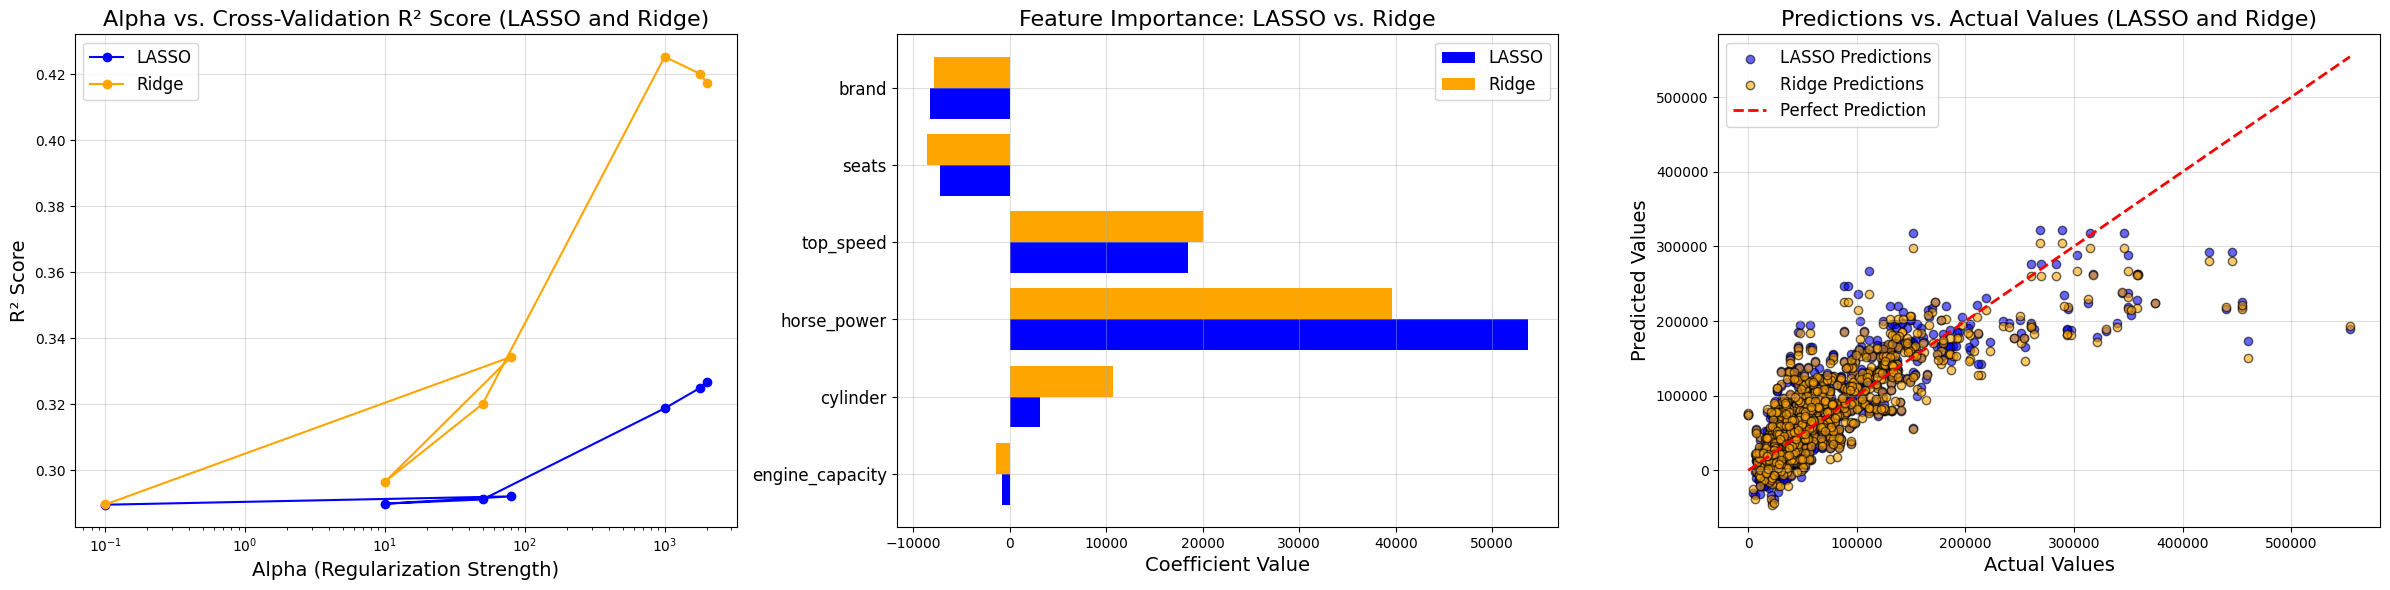

In [110]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

ridge_coefficients = ridge_grid.best_estimator_.coef_
lasso_coefficients = lasso_grid.best_estimator_.coef_

# 1. Alpha vs. R² for LASSO and Ridge
axes[0].plot(lasso_params['alpha'], lasso_grid.cv_results_['mean_test_score'], marker='o', label="LASSO", color='blue')
axes[0].plot(ridge_params['alpha'], ridge_grid.cv_results_['mean_test_score'], marker='o', label="Ridge", color='orange')
axes[0].set_xscale('log')
axes[0].set_title("Alpha vs. Cross-Validation R² Score (LASSO and Ridge)", fontsize=16)
axes[0].set_xlabel("Alpha (Regularization Strength)", fontsize=14)
axes[0].set_ylabel("R² Score", fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(alpha=0.4)

# 2. Feature Importance for LASSO and Ridge
bar_width = 0.4
indices = np.arange(len(numerical_cols))
axes[1].barh(indices - bar_width / 2, lasso_coefficients, bar_width, label="LASSO", color='blue')
axes[1].barh(indices + bar_width / 2, ridge_coefficients, bar_width, label="Ridge", color='orange')
axes[1].set_yticks(indices)
axes[1].set_yticklabels(numerical_cols, fontsize=12)
axes[1].set_title("Feature Importance: LASSO vs. Ridge", fontsize=16)
axes[1].set_xlabel("Coefficient Value", fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(alpha=0.4)

# 3. Predictions vs. Actual Values (LASSO and Ridge)
axes[2].scatter(y_val, y_val_pred_lasso, alpha=0.6, edgecolors="k", color="blue", label="LASSO Predictions")
axes[2].scatter(y_val, y_val_pred_ridge, alpha=0.6, edgecolors="k", color="orange", label="Ridge Predictions")
axes[2].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label="Perfect Prediction")
axes[2].set_title("Predictions vs. Actual Values (LASSO and Ridge)", fontsize=16)
axes[2].set_xlabel("Actual Values", fontsize=14)
axes[2].set_ylabel("Predicted Values", fontsize=14)
axes[2].legend(fontsize=12)
axes[2].grid(alpha=0.4)

plt.tight_layout()
plt.show()


# Model Evaluation on Test Set

In [115]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
# Initialize the RBF model with the best alpha from Grid Search
best_alpha_rbf = 0.1  # Based on Grid Search results
rbf_model = KernelRidge(kernel='rbf', alpha=best_alpha_rbf)

# Fit the model on the training data
rbf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = rbf_model.predict(X_test)

# Calculate performance metrics on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("RBF Model Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test:.3f}")
print(f"Mean Absolute Error (MAE): {mae_test:.3f}")
print(f"R² Score: {r2_test:.2f}")




RBF Model Test Set Evaluation:
Mean Squared Error (MSE): 1017114878.458
Mean Absolute Error (MAE): 14905.802
R² Score: 0.84


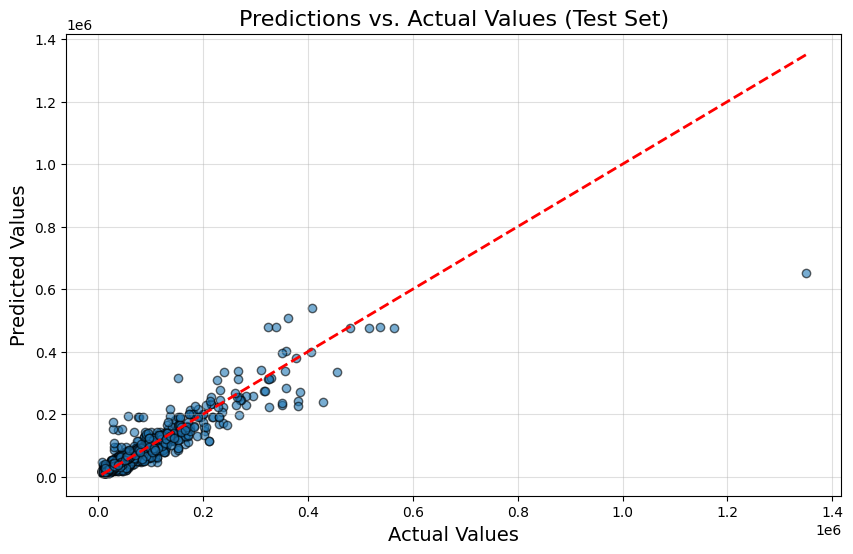

In [112]:
import matplotlib.pyplot as plt

# Visualizing Predictions vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Predictions vs. Actual Values (Test Set)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(alpha=0.4)
plt.show()
